# Figures data from previous studies and meteo info -- Prades



### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import re
import seaborn as sns
from statannotations.Annotator import Annotator

In [2]:
# Conversion Fm (Fraction Modern) to $\Delta$^14^C
def fm_D14C(fm,yr,lft=8267):
    dcy=fm*np.exp((1950-yr)/lft)
    D14C=(dcy-1)*1000
    return D14C

#Conversion $\Delta$^14^C to Fm (Fraction Modern)
def D14C_fm(D14C,yr,lft=8267):
    fm=(D14C/1000+1)*np.exp((yr-1950)/lft)
    return fm

In [3]:
control=[5,7,9,10]
drought=[2,3,4,6]

### Carbon stocks

In [38]:
#con=pd.read_csv('~\\Model_Prades\\Data\\Prades_data_control.csv')
#dro=pd.read_csv('~\\Model_Prades\\Data\\Prades_data_drought.csv')
con=pd.read_csv('Data/Prades_data_control.csv')
dro=pd.read_csv('Data/Prades_data_drought.csv')

# with data from our fieldwork.
con=pd.read_csv('Data/Prades_data_control_plusfieldwork.csv')
dro=pd.read_csv('Data/Prades_data_drought_plusfieldwork.csv')

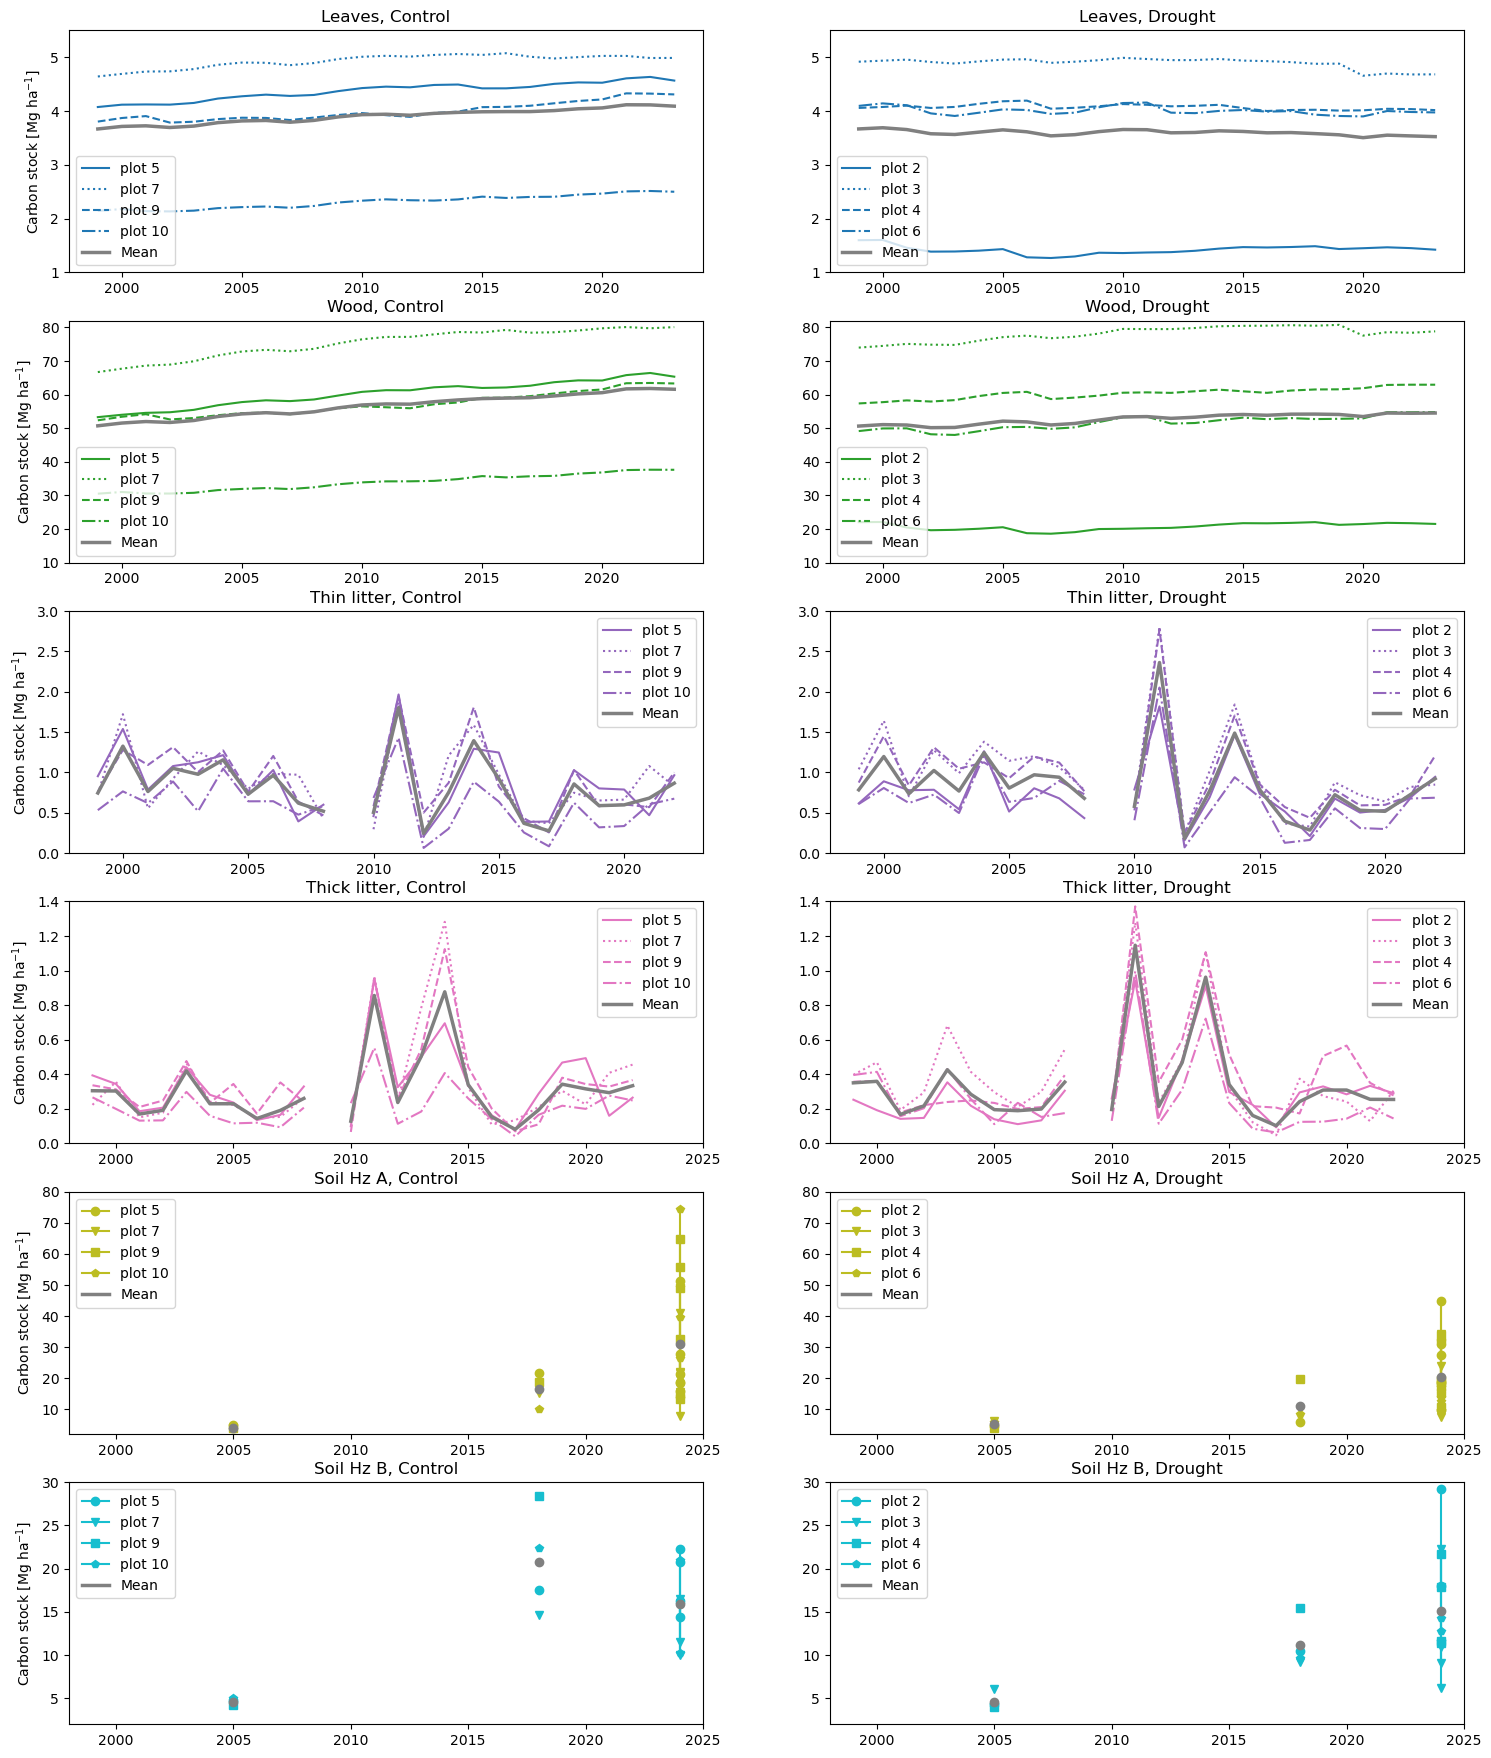

In [45]:
linestyle=['solid','dotted','dashed','dashdot']
markers=['o','v','s','p']
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,6))

fig,axs=plt.subplots(6,2,figsize=[18,22])
for j in range(6):
    for i in range(4): 
        if j<=3:
            axs[j,0].plot(con[con.Plot==control[i]].Year,con[con.Plot==control[i]][con.columns[j+2]],color=colors[j],linestyle=linestyle[i],label='plot '+str(control[i]))
            axs[j,1].plot(dro[dro.Plot==drought[i]].Year,dro[dro.Plot==drought[i]][dro.columns[j+2]],color=colors[j],linestyle=linestyle[i],label='plot '+str(drought[i]))
        else:
            axs[j,0].plot(con[con.Plot==control[i]].Year,con[con.Plot==control[i]][con.columns[j+2]],marker=markers[i],color=colors[j],label='plot '+str(control[i]))
            axs[j,1].plot(dro[dro.Plot==drought[i]].Year,dro[dro.Plot==drought[i]][dro.columns[j+2]],marker=markers[i],color=colors[j],label='plot '+str(drought[i]))
            # our fieldwork
    
        
        # Means       
        if i==3:
            w=con[['Year',con.columns[j+2]]]
            mean=np.zeros(26)
            for k in range(1999,2025):mean[k-1999]=w[w.Year==k].mean().iloc[1]
            axs[j,0].plot(np.arange(1999,2025),mean,color='gray',label='Mean',linewidth=2.5)
            if j>3:axs[j,0].plot(np.arange(1999,2025),mean,'o',color='gray')
           
            w=dro[['Year',dro.columns[j+2]]]
            mean=np.zeros(26)
            for k in range(1999,2025):mean[k-1999]=w[w.Year==k].mean().iloc[1]
            axs[j,1].plot(np.arange(1999,2025),mean,color='gray',label='Mean',linewidth=2.5)
            if j>3:axs[j,1].plot(np.arange(1999,2025),mean,'o',color='gray')
    if j==0:xmin=1; xmax=5.5
    if j==1:xmin=10; xmax=82 
    if j==2:xmin=0; xmax=3
    if j==3:xmin=0; xmax=1.4
    if j==4:xmin=2; xmax=80
    if j==5:xmin=2; xmax=30
    axs[j,0].set_ylim(xmin,xmax);axs[j,1].set_ylim(xmin,xmax)
    if j>=3:axs[j,0].set_xlim(1998,2025);axs[j,1].set_xlim(1998,2025)
    

    axs[j,0].legend();axs[j,1].legend()
    axs[j,0].set_title(str(con.columns[j+2])+', Control'); axs[j,1].set_title(str(dro.columns[j+2])+', Drought')
    axs[j,0].set_ylabel('Carbon stock [Mg ha$^{-1}$]')
        
fig.savefig('Figures/Base_Carbon_stocks_timeseries.pdf',bbox_inches="tight")

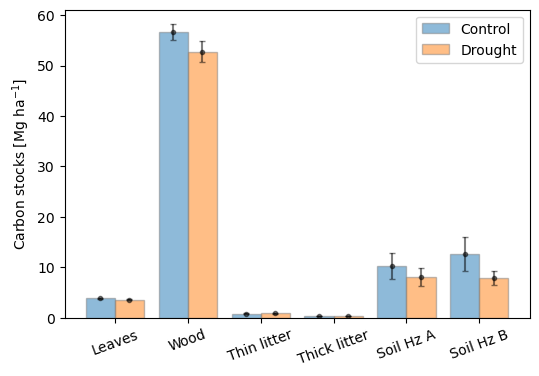

In [6]:
tit=con.columns[2:]
mm=np.zeros([2,6]); sd=np.zeros([2,6])
for i in range(len(tit)):
    mm[0,i]=con[tit[i]].mean(); sd[0,i]=con[tit[i]].std()/np.sqrt(len(con[~con[tit[i]].isna()]))
    mm[1,i]=dro[tit[i]].mean(); sd[1,i]=dro[tit[i]].std()/np.sqrt(len(dro[~dro[tit[i]].isna()]))

fig=plt.subplots(figsize=(6,4)) 
barWidth=0.4 
br1=np.arange(len(tit)) 
br2=[x+barWidth for x in br1] 

plt.bar(br1,mm[0,],width=barWidth,edgecolor='grey',label ='Control',alpha=0.5) 
plt.bar(br2,mm[1,],width=barWidth,edgecolor='grey',label ='Drought',alpha=0.5) 
plt.errorbar(br1,mm[0,],sd[0,],fmt='.',color='Black',alpha=0.5,capsize=2)
plt.errorbar(br2,mm[1,],sd[1,],fmt='.',color='Black',alpha=0.5,capsize=2)
plt.ylabel('Carbon stocks [Mg ha$^{-1}$]') 
plt.xticks([r+barWidth/2 for r in range(len(tit))],tit,rotation=20)
plt.legend()

plt.savefig('Figures/Base_Carbon_stocks_mean.pdf',bbox_inches="tight")

### Demographic structure

In [7]:
#data=pd.read_excel('~\\Model_Prades\\Data\\Estructura demográfica Prades.xlsx')
data=pd.read_excel('Data/Estructura demográfica Prades.xlsx')

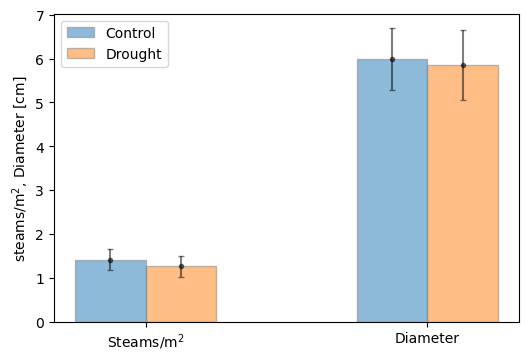

In [8]:
con=data[data['treatment']=='control']
dro=data[data['treatment']=='drought']

fig=plt.subplots(figsize=(6,4)) 
barWidth=0.25 
br1=np.arange(2) 
br2=[x+barWidth for x in br1]

plt.bar(br1,con[con.columns[2:]].mean(),width=barWidth,edgecolor='grey',label ='Control',alpha=0.5) 
plt.bar(br2,dro[dro.columns[2:]].mean(),width=barWidth,edgecolor='grey',label ='Drought',alpha=0.5) 

plt.errorbar(br1,con[con.columns[2:]].mean(),con[con.columns[2:]].std()/2,fmt='.',color='Black',alpha=0.5,capsize=2)
plt.errorbar(br2,dro[dro.columns[2:]].mean(),dro[dro.columns[2:]].std()/2,fmt='.',color='Black',alpha=0.5,capsize=2)
plt.ylabel('steams/m$^2$, Diameter [cm]') 
plt.xticks([r+barWidth/2 for r in range(2)],['Steams/m$^2$','Diameter'])
plt.legend()

plt.savefig('Figures/Base_demographic_structure.pdf',bbox_inches="tight")

### Meteo variables

In [9]:
#data=pd.read_csv('~\\Model_Prades\\Data\\Climate\\Prades_hourly.csv')
data=pd.read_csv('Data/Climate/Prades_hourly.csv')

data['datetime']=pd.to_datetime(data.datetime)

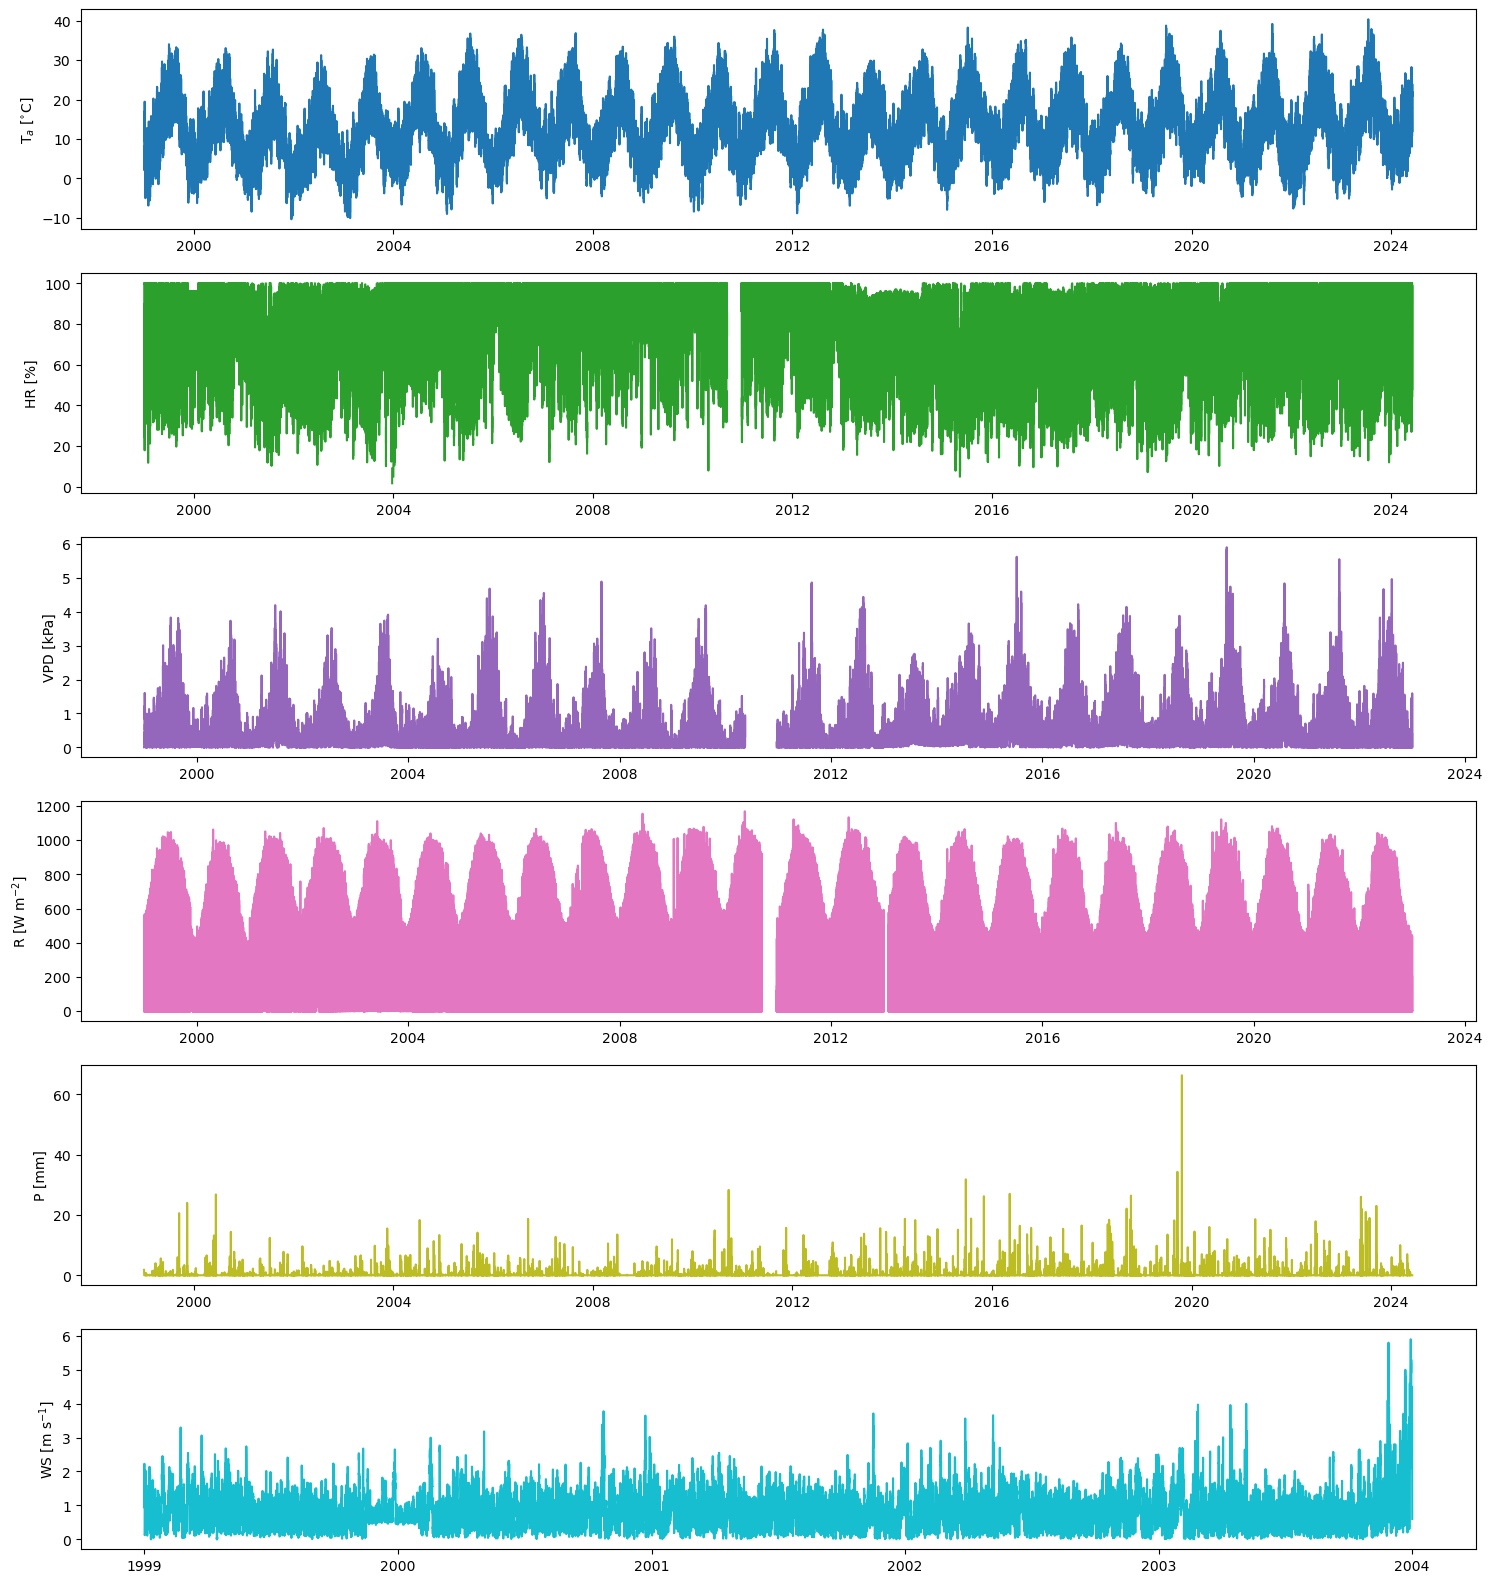

In [10]:
fig,axs=plt.subplots(6,1,figsize=[18,20])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,6))
axs[0].plot(data.datetime,data.Ta,color=colors[0])
axs[0].set_ylabel('T$_a$ [$^{\\circ}$C]')

axs[1].plot(data.datetime,data.HR,color=colors[1])
axs[1].set_ylabel('HR [%]')

axs[2].plot(data.datetime,data.VPD,color=colors[2])
axs[2].set_ylabel('VPD [kPa]')

axs[3].plot(data.datetime,data.R,color=colors[3])
axs[3].set_ylabel('R [W m$^{-2}$]')
                  
axs[4].plot(data.datetime,data.P,color=colors[4])
axs[4].set_ylabel('P [mm]')

#axs[5].plot(data.datetime,data.maxWS,color=colors[0])
axs[5].plot(data.datetime,data.meanWS,color=colors[5])
axs[5].set_ylabel('WS [m s$^{-1}$]')


fig.savefig('Figures/Base_meteo_variables.pdf',bbox_inches="tight")

### Meteo variables during the field trip (30-04 to 03-05 2023)

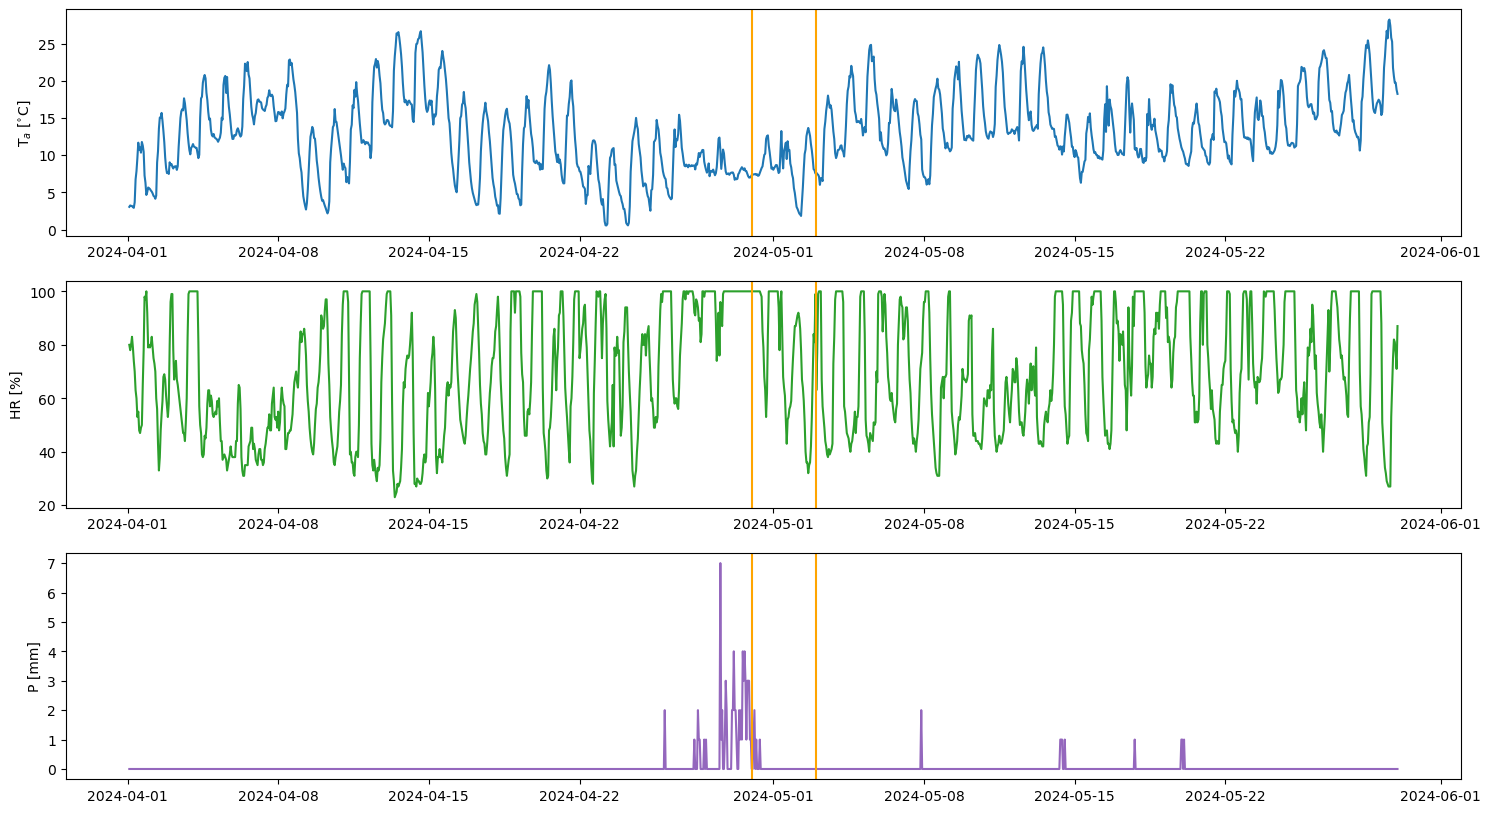

In [12]:
mask=(data.datetime > '2024-4-1 01:00:00') & (data.datetime < '2024-5-30 01:00:00')
data_ft=data.loc[mask]

fig,axs=plt.subplots(3,1,figsize=[18,10])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,6))
axs[0].plot(data_ft.datetime,data_ft.Ta,color=colors[0])
axs[0].set_ylabel('T$_a$ [$^{\\circ}$C]')
axs[0].axvline(dt.datetime(2024,4,30),color='orange')
axs[0].axvline(dt.datetime(2024,5,3),color='orange')

axs[1].plot(data_ft.datetime,data_ft.HR,color=colors[1])
axs[1].set_ylabel('HR [%]')
axs[1].axvline(dt.datetime(2024,4,30),color='orange')
axs[1].axvline(dt.datetime(2024,5,3),color='orange')

axs[2].plot(data_ft.datetime,data_ft.P,color=colors[2])
axs[2].set_ylabel('P [mm]')
axs[2].axvline(dt.datetime(2024,4,30),color='orange')
axs[2].axvline(dt.datetime(2024,5,3),color='orange')

# #axs[5].plot(data.datetime,data.maxWS,color=colors[0])
# axs[5].plot(data.datetime,data.meanWS,color=colors[5])
# axs[5].set_ylabel('WS [m s$^{-1}$]')

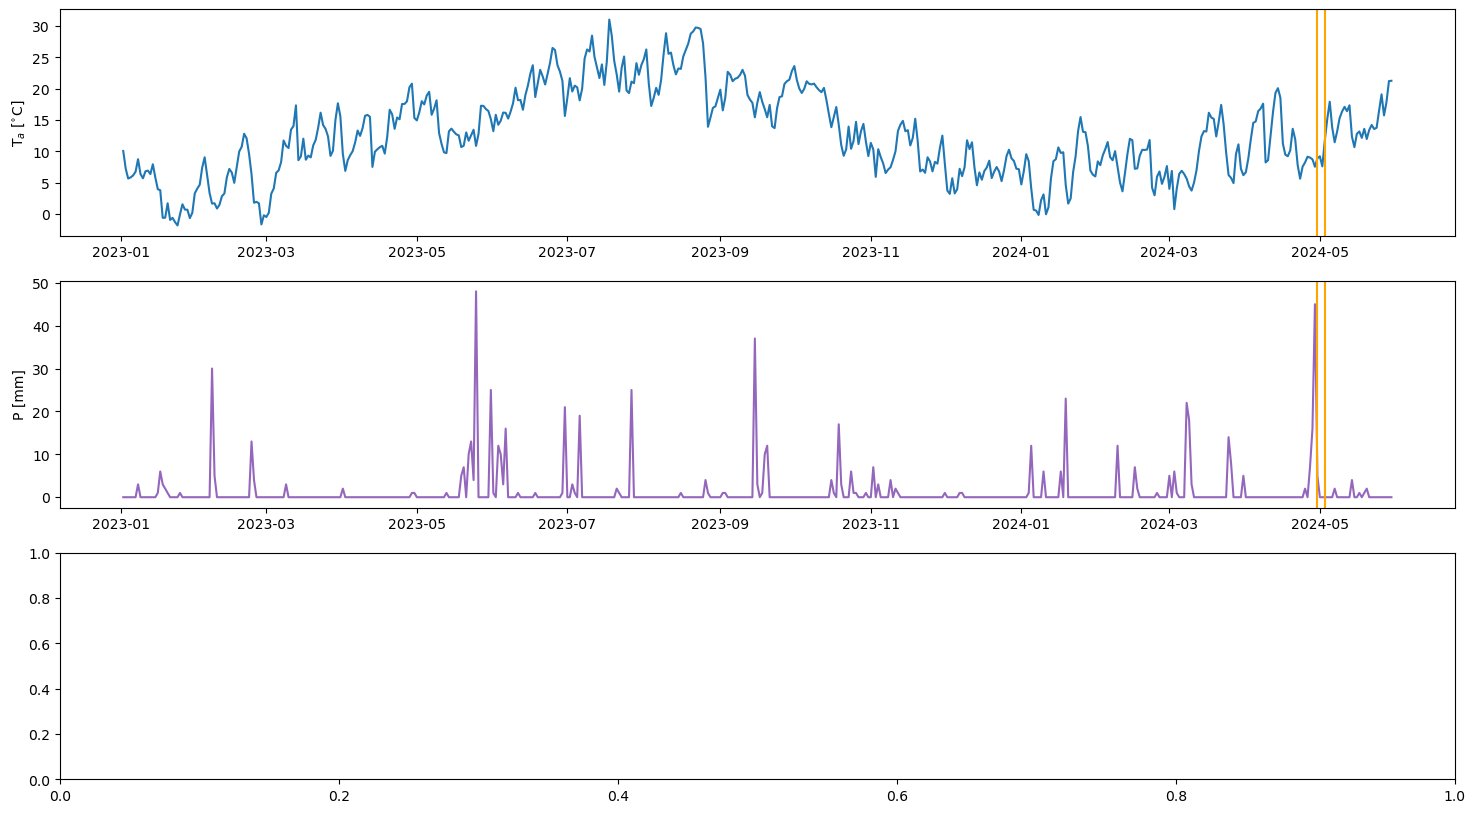

In [15]:
data=pd.read_csv('Data/Climate/Prades_daily.csv')

data['datetime']=pd.to_datetime(data.datetime)

mask=(data.datetime > '2023-1-1 01:00:00') & (data.datetime < '2024-5-30 01:00:00')
data_ft=data.loc[mask]

fig,axs=plt.subplots(3,1,figsize=[18,10])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,6))
axs[0].plot(data_ft.datetime,data_ft.Ta,color=colors[0])
axs[0].set_ylabel('T$_a$ [$^{\\circ}$C]')
axs[0].axvline(dt.datetime(2024,4,30),color='orange')
axs[0].axvline(dt.datetime(2024,5,3),color='orange')


axs[1].plot(data_ft.datetime,data_ft.P,color=colors[2])
axs[1].set_ylabel('P [mm]')
axs[1].axvline(dt.datetime(2024,4,30),color='orange')
axs[1].axvline(dt.datetime(2024,5,3),color='orange')

### Soil moisture

In [46]:
#data_sm=pd.read_excel('~\\Model_Prades\\Data\\Climate\\Soil_Moisture\\SM_Prades.xlsx')
data_sm=pd.read_excel('Data/Climate/Soil_moisture/SM_Prades.xlsx')
data_sm['datetime']=pd.to_datetime(data_sm.dia)
data_sm.loc[(data_sm['Hum sòl (% v/v)']<0) | (data_sm['Hum sòl (% v/v)']>100),'Hum sòl (% v/v)']=np.nan

/tmp/ipykernel_10534/2610448012.py:17: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  for k in range(len(times)):mean[k]=w[w.datetime==times[k]].mean().iloc[0]
/tmp/ipykernel_10534/2610448012.py:23: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  for k in range(len(times)):mean[k]=w[w.datetime==times[k]].mean().iloc[0]


Text(0.5, 1.0, 'Drought plots')

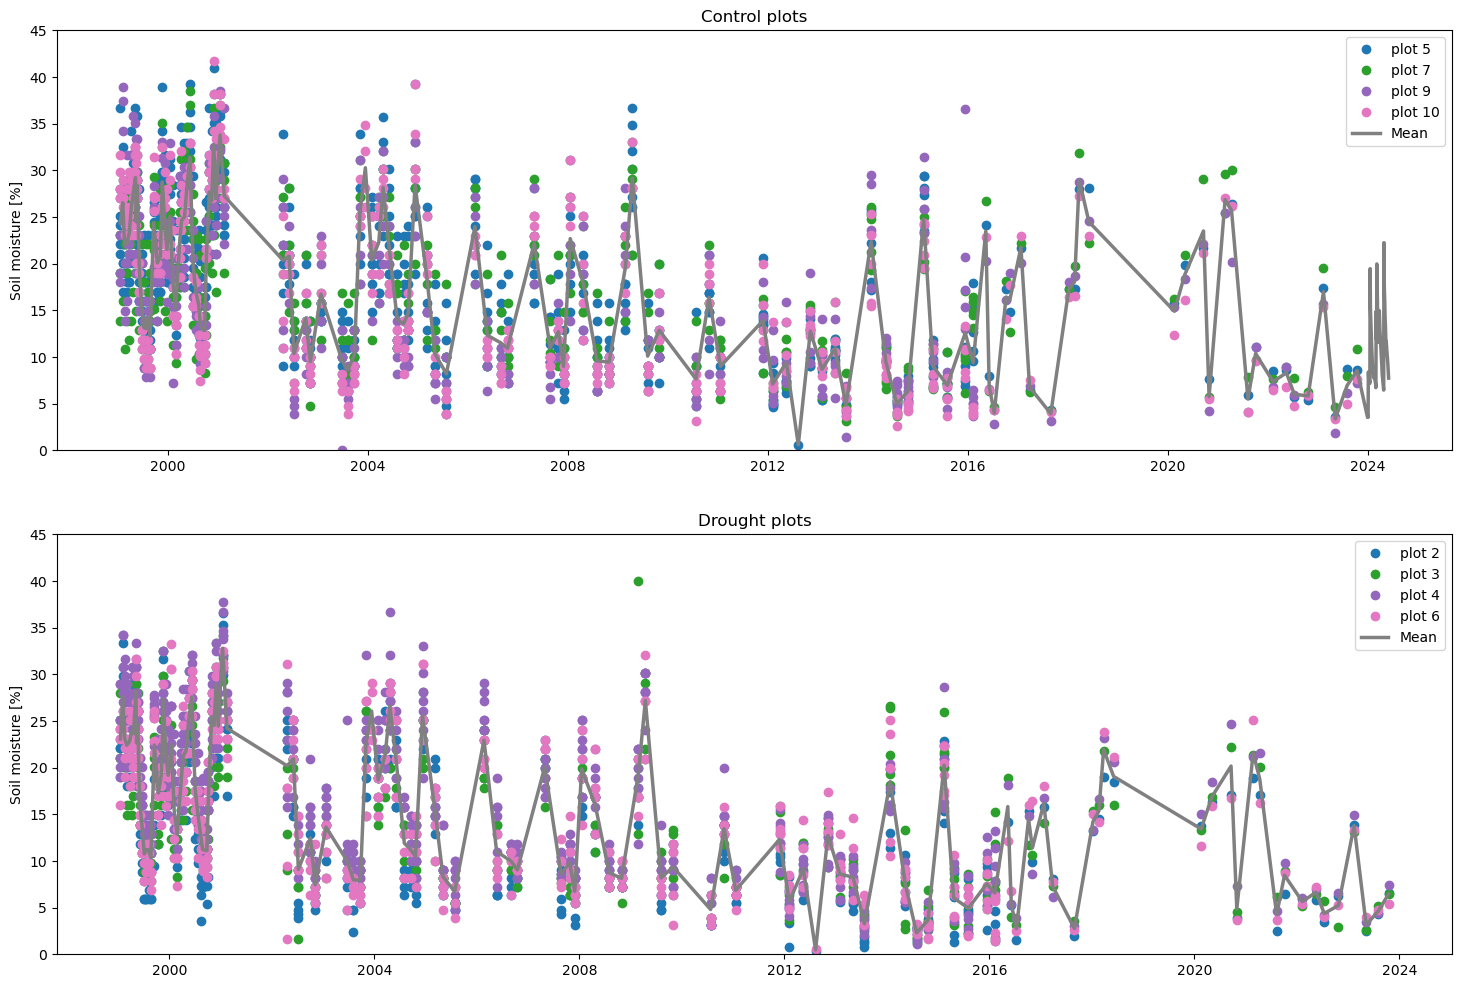

In [47]:
con=data_sm[data_sm.tractament=='control']
dro=data_sm[data_sm.tractament=='sequera']

fig,axs=plt.subplots(2,1,figsize=[18,12])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,6))

for i in range(4):
    axs[0].plot(con[con['parcel.la']==control[i]].datetime,con[con['parcel.la']==control[i]]['Hum sòl (% v/v)'],
                'o',color=colors[i],label='plot '+str(control[i]))
    axs[1].plot(dro[dro['parcel.la']==drought[i]].datetime,dro[dro['parcel.la']==drought[i]]['Hum sòl (% v/v)'],
                'o',color=colors[i],label='plot '+str(drought[i]))
    if i==3:
        w=con[['datetime',con.columns[4]]]
        times=w.datetime.unique()#.tolist()
        mean=np.zeros(len(times))
        for k in range(len(times)):mean[k]=w[w.datetime==times[k]].mean().iloc[0]
        axs[0].plot(times,mean,color='gray',label='Mean',linewidth=2.5)
        
        w=dro[['datetime',dro.columns[4]]]
        times=w.datetime.unique()
        mean=np.zeros(len(times))
        for k in range(len(times)):mean[k]=w[w.datetime==times[k]].mean().iloc[0]
        axs[1].plot(times,mean,color='gray',label='Mean',linewidth=2.5)
    
axs[0].set_ylim(0,45); axs[1].set_ylim(0,45)      
axs[0].set_ylabel('Soil moisture [%]'); axs[1].set_ylabel('Soil moisture [%]') 
axs[0].legend();axs[1].legend()
axs[0].set_title('Control plots'); axs[1].set_title('Drought plots')

### SM during field trip

Text(0, 0.5, 'Soil moisture [%]')

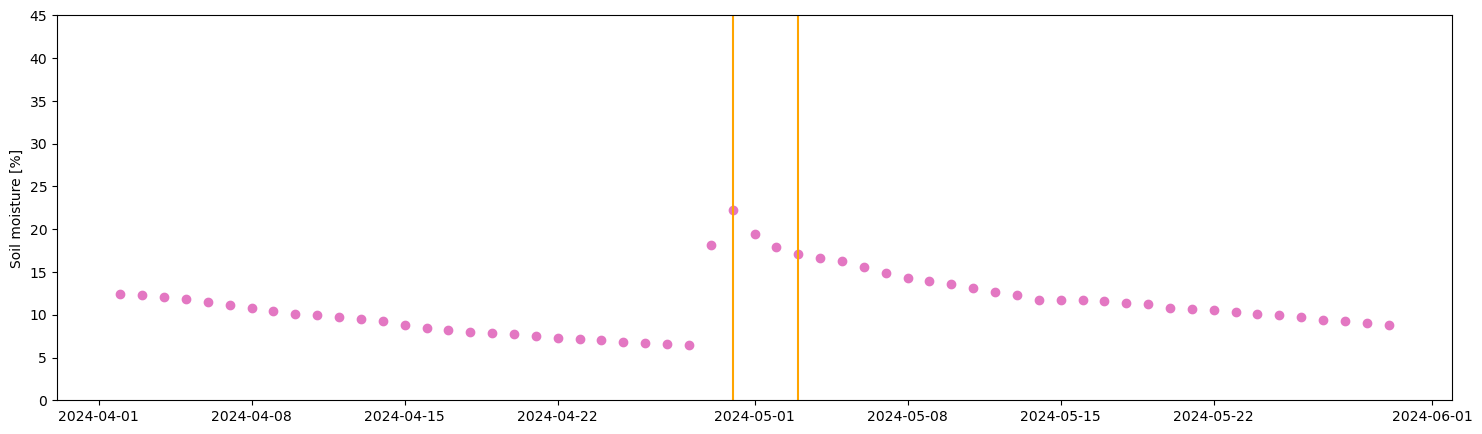

In [52]:
mask=(data_sm.datetime > '2024-4-1 01:00:00') & (data_sm.datetime < '2024-5-30 01:00:00')
data_ft=data_sm.loc[mask]

fig,axs=plt.subplots(1,figsize=[18,5])
cmap=plt.cm.tab10

con=data_ft[data_ft.tractament=='control']
axs.plot(con.datetime,con['Hum sòl (% v/v)'],
                'o',color=colors[i],label='plot '+str(control[i]))

axs.axvline(dt.datetime(2024,4,30),color='orange')
axs.axvline(dt.datetime(2024,5,3),color='orange')
axs.set_ylim(0,45)     
axs.set_ylabel('Soil moisture [%]')
